In [1]:
from matplotlib import pyplot as plt
import numpy as np
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

#plt.rcParams['figure.facecolor'] = 'white'
#plt.rcParams['figure.edgecolor'] = 'white'

def pltRmax(ax):
  pass
  #ax.plot((rmax,rmax),ax.get_ylim(),linestyle='--',color='black')

def plotParams():
  axs[0].plot(r,P)
  axs[0].set_xlabel('r (km)')
  axs[0].set_ylabel('P (hPa)')
  axs[0].grid(True)
  
  axs[1].plot(r,dPdr)
  axs[1].set_xlabel('r (km)')
  axs[1].set_ylabel('dP/dr (hPa/km)')
  axs[1].grid(True)

  axs[2].plot(r,dPdt)
  axs[2].set_xlabel('r (km)')
  axs[2].set_ylabel('dP/dt')
  axs[2].grid(True)

def smooth(x, N):
  return np.convolve(x, np.ones((N,))/N)[(N-1):]


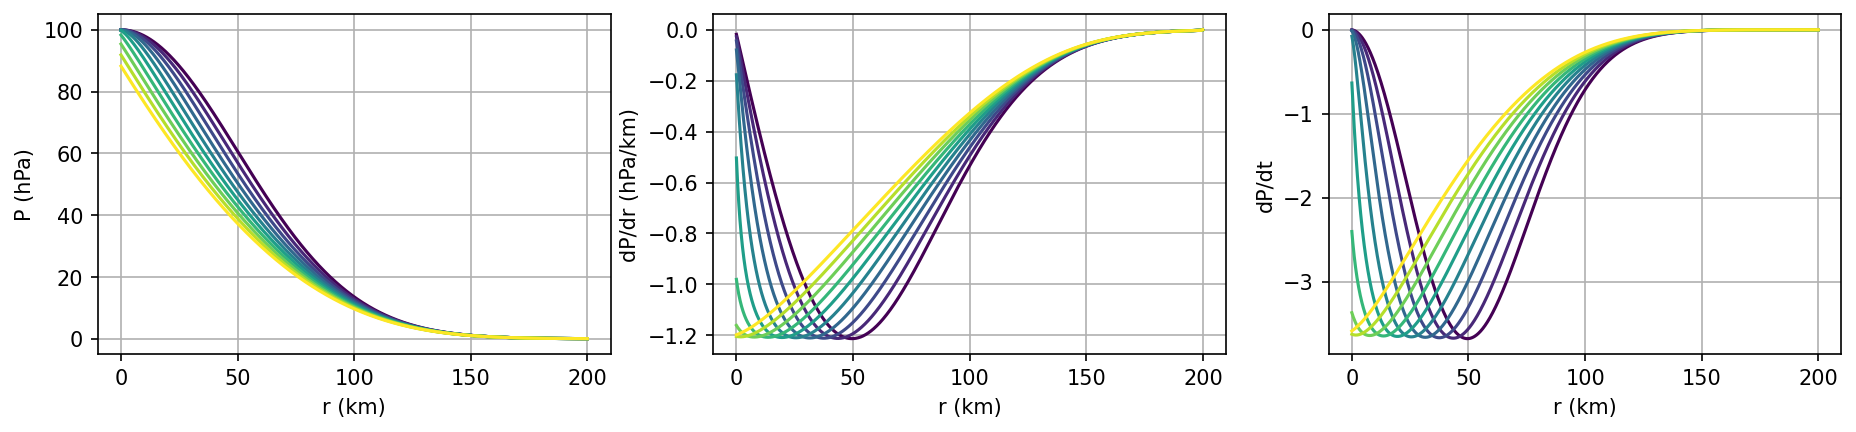

In [2]:
P0=100
rmax=50
a=0.5
b=50
c=0.5
Cd=1

dr=0.1
dt=0.1
r=np.arange(0,200,dr)

n=10 # plot every n frames
N = 100 # N iterations
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,round(N/n))))

# evolve P at each timestep, update dPdr,Vt,Vr,dPdt accordingly
fig,axs=plt.subplots(1,3,figsize=(15,3),dpi=150)
P=P0*np.exp(-a*(r/rmax)**2)
for i in range(0,N):
  dPdr=smooth(np.gradient(P,dr),10)
  Vt=b*dPdr
  Vr=c*Cd*Vt
  dPdt=-Vr*dPdr*0.1
  if i%10==0:
    plotParams()
  P=P+dPdt*dt
